for example, we have something like this chart of our classifier:


              classified as human                                             classified as robot
                                                      |                                                                     
                20 robots                             |                          30 robots                                
                40 persons                            |                          10 persons                                    
                                                      |                                             
                                                      
                                                      
TP :
'Positive' means that the classified items are on the right side of my line(our threshhold)
'True' means that we recognized the class correctly. Our class on right side is ROBOTS, so our TP is 30 robots

FP :
'Positive' means that the classified items are on the right side of my line(our threshhold)
'False' means that we recognized the class incorrectly. Our class on right side is ROBOTS, but we recognized 10 persons as robots, so our FP is 10 persons

TN :
'Negative' means that the classified items are on the left side of my line(pur threshhold)
'True' means that we recognized the class correctly. Our class on left side is PERSONS, so our TN is 40 persons

FN :
'Negative' means that the classified items are on the left side of my line(pur threshhold)
'False' means that we recognized the class incorrectly. Our class on left side is PERSONS, but we recognized 20 robots as persons, so our FN is 20 robots

    
in our function PRECISION we have:
1) TP = sum(data[threshold:]) 
it means that, we take our positive-classified items, wich are located on the right side of threshold('data[threshold:]' means that we take all numbers from threshold to the end). After that wecalculate the sum of this numbers, because our positice items are 1, so to calculate all true positive numbers we need to calculate the sum of 1 on the right side of data

2) FP = len(data[threshold:]) - TP
it means that, we take our positive-classified items, wich are located on the right side of threshold('data[threshold:]' means that we take all numbers from threshold to the end). After that we calculate the length of this list, to get the number of all positive numbers, and we substract TP, because our positive numbers consist of TP and FP, and to get FP we need substract TP



    
in our function RECALL we have:
1) TP is calculated like i explained before, they are similar
2) FN = sum(data[:threshold])
it means that, we take all negative-classified numbers, wich are located on the left side of threshold('data[:threshold]' means that we take all numbers from the beginning to the threshold). After that we calculate the sum of this list, because FN means, that we classified robots as humans, and they are on the left side, and the class of robots is 1, so FN are all 1s on the left side of the threshold, so to calculate the number we need just to calculate sum of 1s

30 0.8333333333333333


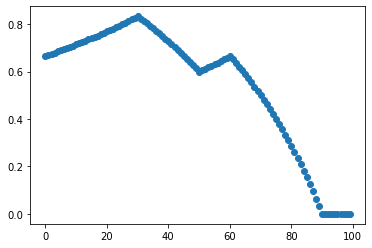

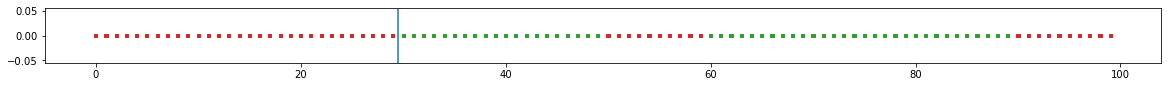

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
yandex_data =   [0] * 30 + [1] * 10 + [1] * 10 + [0] * 10 + [1] * 30  + [0] * 10

# args: binary list (0-1 values) and threshold
def precision(data, threshold):
    # positive: data[threshold:] 
    # negative: data[:threshold]
    TP = sum(data[threshold:]) 
    FP = len(data[threshold:]) - TP
    if TP == 0 and FP == 0:
        return 0
    return TP / (TP + FP)

def recall(data, threshold):
    TP = sum(data[threshold:])
    FN = sum(data[:threshold])
    if TP == 0 and FN == 0:
        return 0
    return TP / (TP + FN)

def f_score(data, threshold):
    # print(threshold)
    _precision = precision(data, threshold)
    _recall = recall(data, threshold)
    if _precision == 0 and _recall == 0:
        return 0
    return 2 * _precision * _recall / (_precision + _recall)



X = []
y = []
for t in range(100):
    X.append(t)
    y.append(f_score(yandex_data, t))
    #print(t, f_score(yandex_data, t))
print(y.index(max(y)), max(y))
threshold = y.index(max(y))

plt.scatter(X, y)

fig = plt.figure(figsize=(20, 1))
plt.scatter(range(100), [0] * 100, marker='s',
           c=['tab:green' if res == 1 else 'tab:red' for res in yandex_data], s=10)
plt.scatter([threshold - 0.5], [0], marker='|', s=3000)

In [3]:
# [0:40) - 30 persons, 10 robots
# [40:60) - 10 persons, 10 robots
# [60: 100) - 10 persons, 30 robots

In [ ]:
# list, f_score, threshold
# [0] * 30 + [1] * 10  + [0] * 10 + [1] * 10 + [1] * 30 + [0] * 10     0.83     30
# [1] * 10 + [0] * 30  + [0] * 10 + [1] * 10 + [1] * 30 + [0] * 10     0.8      50
# [1] * 10 + [0] * 30  + [1] * 10 + [0] * 10 + [1] * 30 + [0] * 10     0.72     40
# [1] * 10 + [0] * 30  + [1] * 10 + [0] * 10 + [0] * 10 + [1] * 30     0.75     70
# [0] * 30 + [1] * 10 + [0] * 10 + [1] * 10 + [0] * 10 + [1] * 30      0.83     30
# [0] * 30 + [1] * 10 + [1] * 10 + [0] * 10 + [1] * 30 + [0] * 10      0.83     30
# [1] * 10 + [0] * 30 + [0] * 10 + [1] * 10 + [0] * 10  + [1] * 30     0.8      50